In [4]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gamma
from scipy.stats import expon, lognorm, weibull_min
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.mixture import GaussianMixture

Explore data in Dataframe

In [5]:
raw_train_sample = np.load("/work/bd1179/b309246/phd_thesis/sarauer23_microphysics_parametrization/pytorch_nextgems/data/df_nextgems_mig_subset_train.npy")

# inputs: "dz_mig","pf_mig","ta_mig","qv_mig","qc_mig","qi_mig","qr_mig","qs_mig","qg_mig",
inputs_train_sample = raw_train_sample[:,:]
#inputs_train_sample.shape
#standardized_data = (inputs_train_sample - np.mean(inputs_train_sample, axis=0)) / np.std(inputs_train_sample, axis=0)
#test = inputs_train_sample[:,2]
#print(f"Mean {np.mean(test)} Standard deviation {np.std(test)}")
#print(f"This results to min cut: {np.mean(test)-0.5*np.std(test)}")
#print(f"This results to max cut: {np.mean(test)+0.5*np.std(test)}")
#plt.hist(test)
df_inputs_train_sample = pd.DataFrame(inputs_train_sample, columns=["dz_mig", "pf_mig", "ta_mig","qv_mig","qc_mig","qi_mig","qr_mig","qs_mig","qg_mig","tend_ta_mig","tend_qv_mig","tend_qc_mig","tend_qi_mig","tend_qr_mig","tend_qs_mig","tend_qg_mig"])
df_inputs_train_sample

,dz_mig,pf_mig,ta_mig,qv_mig,qc_mig,qi_mig,qr_mig,qs_mig,qg_mig,tend_ta_mig,tend_qv_mig,tend_qc_mig,tend_qi_mig,tend_qr_mig,tend_qs_mig,tend_qg_mig
0,195.563217,88856.218750,272.284332,0.003358,7.563657e-05,5.344963e-10,2.654934e-07,5.580280e-07,1.336643e-05,0.000094,-3.666769e-08,3.057498e-09,8.117166e-14,-1.654123e-09,2.411642e-11,1.125124e-08
1,239.176788,82946.476562,290.157959,0.006859,2.166231e-05,1.255736e-16,1.427594e-05,2.289485e-16,7.495506e-15,0.000027,-1.331218e-08,2.141165e-09,-4.862543e-23,2.121426e-09,-4.417412e-22,-8.565355e-17
2,151.825790,85984.945312,261.224609,0.001634,6.510068e-09,1.506794e-06,2.469429e-16,3.266776e-05,1.350577e-06,0.000033,-1.201982e-08,-4.925158e-11,1.292611e-10,-2.343512e-21,-2.111360e-10,-8.415659e-11
3,210.325317,83968.015625,275.704163,0.005414,3.998266e-04,1.027362e-14,6.827609e-06,6.799739e-14,1.834672e-07,0.000095,-4.176799e-08,2.090531e-08,-1.220234e-16,8.303203e-10,7.765568e-17,2.100081e-10
4,195.563324,88478.109375,272.084290,0.003820,1.347167e-04,1.407822e-09,1.899502e-08,1.183859e-10,1.358293e-06,0.000030,-1.177918e-08,5.288069e-09,2.094953e-13,-1.461262e-11,1.446387e-14,-2.425504e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166661,115.436073,97631.234375,297.687744,0.017315,5.596583e-08,2.119335e-16,2.365417e-06,3.201360e-16,2.141052e-16,-0.000007,3.078725e-09,-1.386998e-09,-1.626049e-22,-5.880140e-10,-2.900263e-21,-1.313450e-20
4166662,377.873199,56869.332031,271.858643,0.005041,2.375542e-05,4.738601e-10,4.587077e-06,6.296741e-06,1.166710e-05,0.000045,-1.987866e-08,-1.279007e-08,-1.351945e-13,-2.069799e-08,1.404589e-09,4.935726e-08
4166663,239.176971,82701.351562,289.828461,0.010457,9.073105e-06,2.180595e-16,8.275525e-06,2.134098e-16,1.847175e-16,0.000030,-1.389290e-08,-1.381663e-09,-5.568084e-22,5.878535e-09,2.400684e-22,-7.456601e-21
4166664,373.361511,42031.113281,252.211105,0.001392,1.440565e-06,1.563947e-05,3.332089e-13,6.289632e-05,1.730933e-06,0.000107,-3.893861e-08,-5.482116e-09,8.074521e-10,-1.114625e-15,1.507918e-08,-3.208515e-10


Function to calculate relative humidity

In [6]:
def calculate_relative_humidity(pressure, temperature, mixing_ratio):
    temperature = temperature
    pressure = pressure*10
    # Calculate the saturation vapor pressure using the Tetens formula
    e_s = 6.112 * np.exp((17.67 * temperature) / (temperature + 243.5))
    # Calculate the saturation mixing ratio
    r_s = 0.622 * (e_s / (pressure - e_s))
    # Calculate the relative humidity
    relative_humidity = (mixing_ratio / r_s) *100
    return relative_humidity


Test for scaling options

In [7]:
# generate dataframe
#rel_hum = calculate_relative_humidity(df['pf_mig'], df['ta_mig'], df['qv_mig'])
#df["rel_hum"] = calculate_relative_humidity(df['pf_mig'], df['ta_mig'], (df['qv_mig']+df['qc_mig']+df['qi_mig']))
#test = calculate_relative_humidity(100000, 273,0.000001)
#df = df[(df['rel_hum'] >= 2)]    
#df_test = df_inputs_train_sample[(df_inputs_train_sample['is_mig_active'] == 1)]
df_test_2 = df_inputs_train_sample[(df_inputs_train_sample['qi_mig'] > 10**(-6))|(df_inputs_train_sample['qc_mig']> 10**(-5))]
#df_filter_warm = df_test_2[(df_inputs_train_sample['qs_mig']+df_inputs_train_sample['qg_mig']+df_inputs_train_sample['qr_mig'] > 10**(-7))]
df_filter_warm = df_test_2
#df_filter_cold = df_inputs_train_sample[(df_inputs_train_sample['qi_mig'] > 10**(-7))]
#df_filter_warm["test"] = df_filter_warm["tend_qi_mig"]*40/df_filter_warm["qi_mig"]
#bins = np.linspace(-1, 1, 50)


In [8]:
df_transformed_warm = df_inputs_train_sample
#df_transformed_cold = df_filter_cold
columns_to_log_transform = [ "dz_mig", "pf_mig","ta_mig", "qv_mig", "qc_mig", "qi_mig", "qr_mig", "qs_mig", "qg_mig"]

In [9]:
def log_transform(x):
    print(x)
    return np.log(x + 1)

In [10]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to each selected column
columns=["dz_mig", "pf_mig", "ta_mig","qv_mig","qc_mig","qi_mig","qr_mig","qs_mig","qg_mig","tend_ta_mig","tend_qv_mig","tend_qc_mig","tend_qi_mig","tend_qr_mig","tend_qs_mig","tend_qg_mig"]
#
for column in columns:
    #df_transformed_cold[column] = scaler.fit_transform(df_transformed_cold[[column]])
    df_transformed_warm[column] = scaler.fit_transform(df_transformed_warm[[column]])
    #df[column] = scaler.fit_transform(df[[column]])

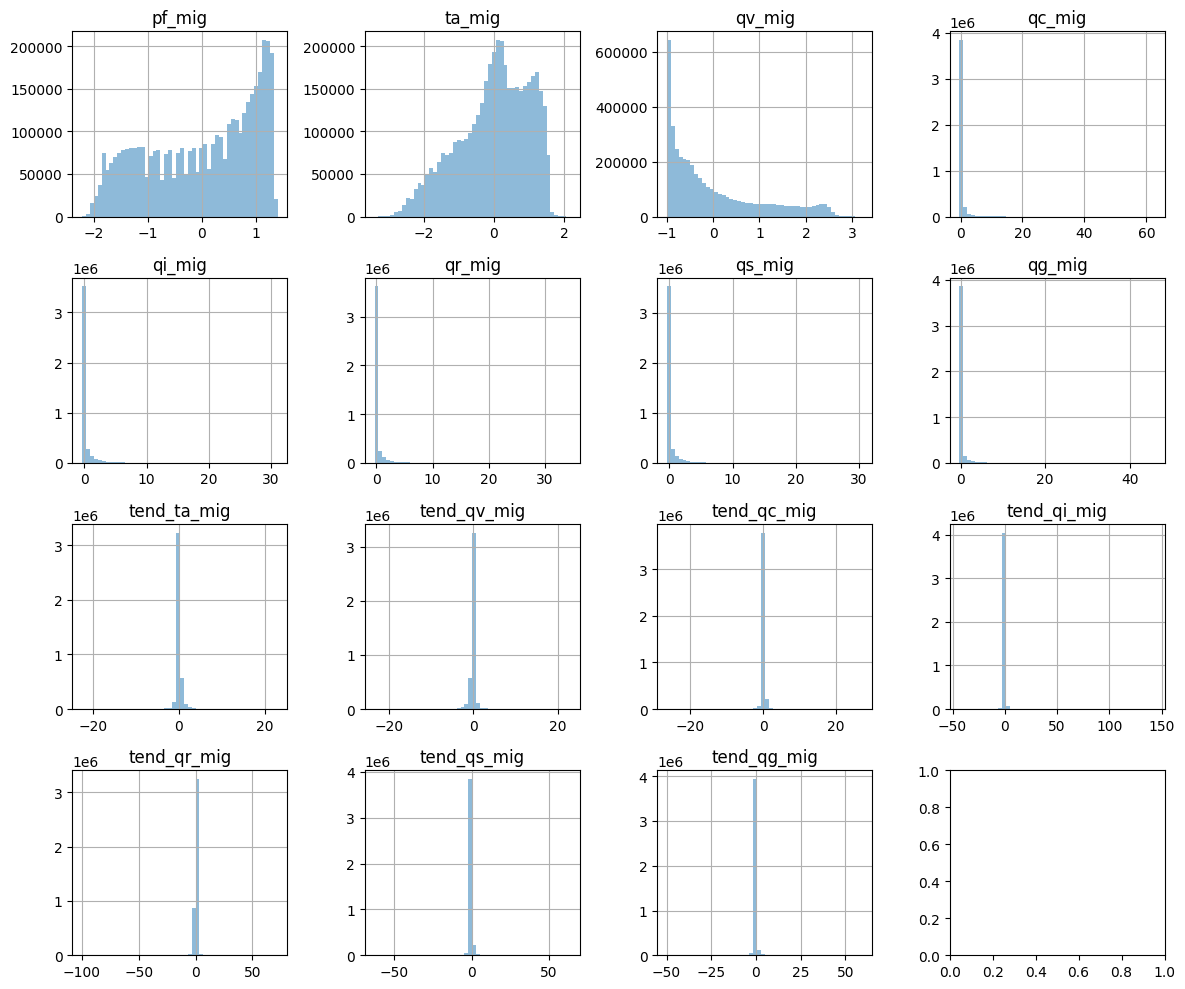

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Generate some random data for the histograms
data1 = df_transformed_warm[["pf_mig","ta_mig","qv_mig","qc_mig","qi_mig","qr_mig","qs_mig","qg_mig", "tend_ta_mig","tend_qv_mig","tend_qc_mig","tend_qi_mig","tend_qr_mig","tend_qs_mig","tend_qg_mig"]]

fig, axes = plt.subplots(4, 4, figsize=(12, 10))

axes = axes.flatten()

# Plot histograms for each column in the DataFrame
for i, (col, ax) in enumerate(zip(data1.columns, axes)):
    ax.hist(data1[col], bins=50, alpha=0.5)

    ax.set_title(col)
    ax.grid(True)
plt.tight_layout()

plt.show()

Generate confusion matrix

/tmp/ipykernel_3624484/1713547494.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  matrix = matrix.applymap(lambda x: 0 if -0.005 < x < 0.005 else round(x, 2))


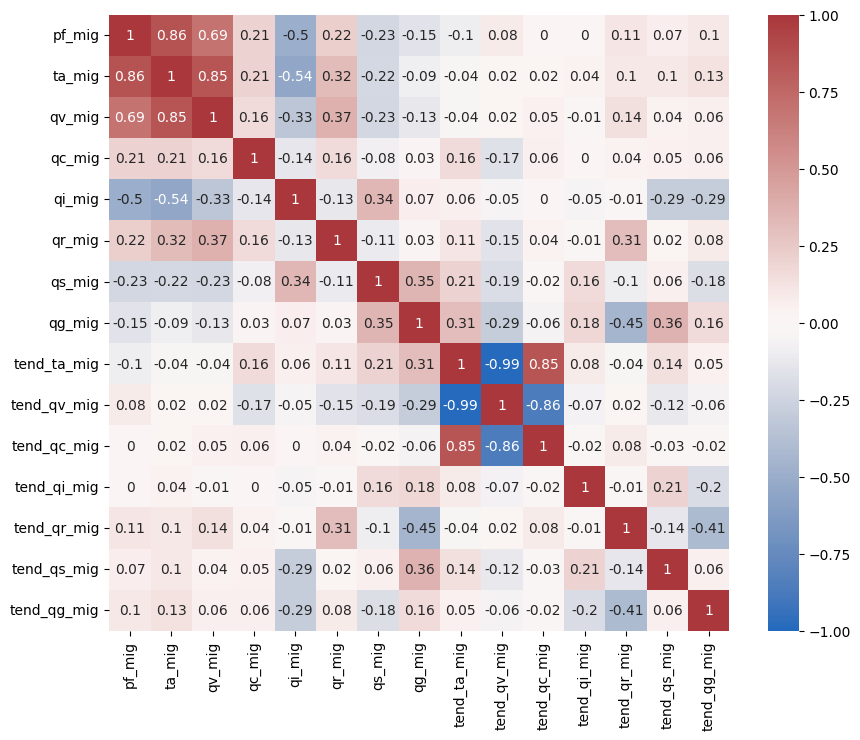

             pf_mig  ta_mig  qv_mig  qc_mig  qi_mig  qr_mig  qs_mig  qg_mig  \
pf_mig         1.00    0.86    0.69    0.21   -0.50    0.22   -0.23   -0.15   
ta_mig         0.86    1.00    0.85    0.21   -0.54    0.32   -0.22   -0.09   
qv_mig         0.69    0.85    1.00    0.16   -0.33    0.37   -0.23   -0.13   
qc_mig         0.21    0.21    0.16    1.00   -0.14    0.16   -0.08    0.03   
qi_mig        -0.50   -0.54   -0.33   -0.14    1.00   -0.13    0.34    0.07   
qr_mig         0.22    0.32    0.37    0.16   -0.13    1.00   -0.11    0.03   
qs_mig        -0.23   -0.22   -0.23   -0.08    0.34   -0.11    1.00    0.35   
qg_mig        -0.15   -0.09   -0.13    0.03    0.07    0.03    0.35    1.00   
tend_ta_mig   -0.10   -0.04   -0.04    0.16    0.06    0.11    0.21    0.31   
tend_qv_mig    0.08    0.02    0.02   -0.17   -0.05   -0.15   -0.19   -0.29   
tend_qc_mig    0.00    0.02    0.05    0.06    0.00    0.04   -0.02   -0.06   
tend_qi_mig    0.00    0.04   -0.01    0.00   -0.05 

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df_transformed_warm[[ "pf_mig", "ta_mig","qv_mig","qc_mig","qi_mig","qr_mig","qs_mig","qg_mig","tend_ta_mig","tend_qv_mig","tend_qc_mig","tend_qi_mig","tend_qr_mig","tend_qs_mig","tend_qg_mig"]]

matrix = df_subset.corr().round(2)
matrix = matrix.applymap(lambda x: 0 if -0.005 < x < 0.005 else round(x, 2))

fig = plt.figure(figsize=(10, 8))
subfig = fig.add_subplot()
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

plt.show()

print(matrix)
